# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [14]:
#While this data is primarily anchored on one present marketing campaign, it also references call made to potential clients through prior campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [18]:
#Exploring the data

# Understanding data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
# Understanding spread of numerical data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
#Undertand value spread for object features
df.select_dtypes('object').nunique()

,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


In [21]:
# Understand unique values for each object data type:
for col in df.select_dtypes('object'):
        print(col)
        print(df[col].unique())
        print(" ")
        print(" ")

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
 
 
marital
['married' 'single' 'divorced' 'unknown']
 
 
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
 
 
default
['no' 'unknown' 'yes']
 
 
housing
['no' 'yes' 'unknown']
 
 
loan
['no' 'yes' 'unknown']
 
 
contact
['telephone' 'cellular']
 
 
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
 
 
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
 
 
poutcome
['nonexistent' 'failure' 'success']
 
 
y
['no' 'yes']
 
 


In [22]:
#Check for duplicates
df.duplicated().sum()

np.int64(12)

In [23]:
#Drop duplicates:
df.drop_duplicates(inplace = True)

In [24]:
#Check for missing values
df.isna().sum()

#No missing values in place

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [25]:
#Since some of the object type features have "unknown" value (equivalent to missing info), check what % of the column data is "unknown" or "nonexistent"
unknown_values = ['unknown', 'nonexistent']
cols = df.select_dtypes(include=['object']).columns
percentages = {}

for col in cols:
    total = len(df)
    count = df[col].isin(unknown_values).sum()
    percent = (count / total) * 100
    percentages[col] = percent

result_df = pd.DataFrame.from_dict(percentages, orient='index', columns=['% Unknown Values'])
result_df


,% Unknown Values
job,0.801438
marital,0.194288
education,4.201477
default,20.876239
housing,2.404313
loan,2.404313
contact,0.000000
month,0.000000
day_of_week,0.000000
poutcome,86.339130


In [26]:
#Majority of outcomes from previous campaign ("poutcome) are non-existent (86% missing), drop this column as it is less informative
df.drop(columns = 'poutcome', inplace = True)

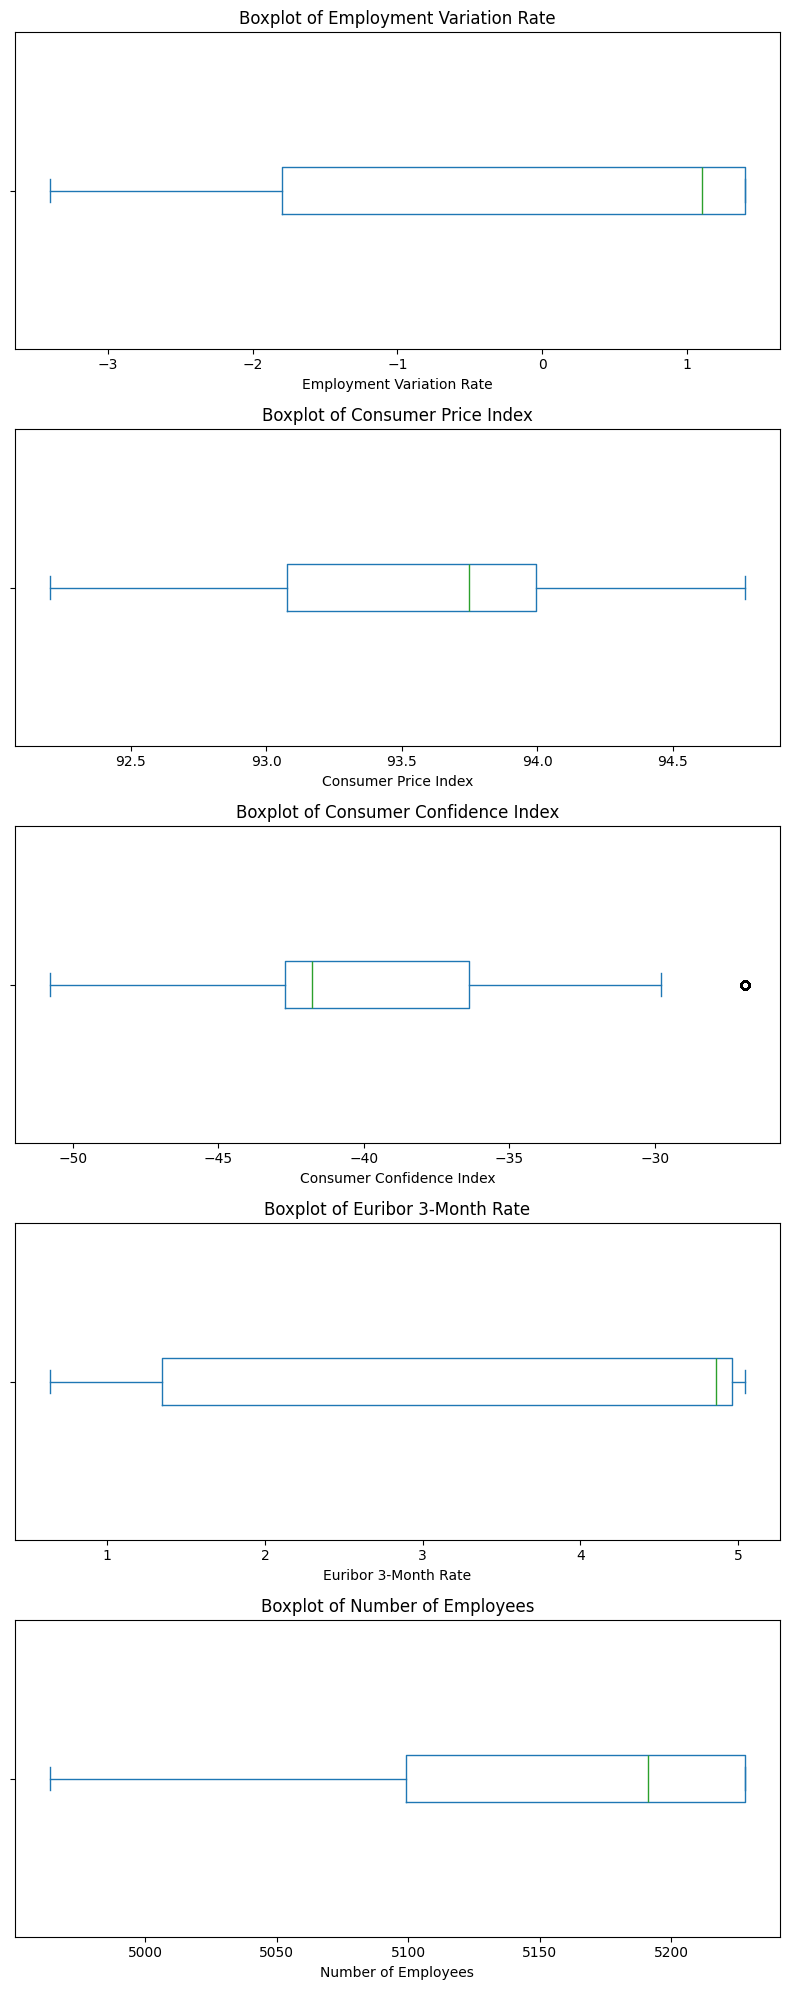

In [27]:
#Columns in the social and economic context attributes seem to have limited spread in data. Here we plot them to further visualize the data spread

import matplotlib.pyplot as plt

col_labels = {
    "emp.var.rate": "Employment Variation Rate",
    "cons.price.idx": "Consumer Price Index",
    "cons.conf.idx": "Consumer Confidence Index",
    "euribor3m": "Euribor 3-Month Rate",
    "nr.employed": "Number of Employees"
}

columns = list(col_labels.keys())

fig, axes = plt.subplots(len(columns), 1, figsize=(8, 4 * len(columns)))

for ax, col in zip(axes, columns):
    df[col].plot(kind='box', vert=False, ax=ax, title=f"Boxplot of {col_labels[col]}")
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.set_xlabel(col_labels[col])

plt.tight_layout()

# Here we see that two columns Consumer price index and Number of empoloyees have limited spread. Since they will not be informative for the classification problem,  we drop both of them

In [28]:
#Drop Number of Employees and Consumer Price Index
df.drop(columns = ['nr.employed', 'cons.price.idx'], inplace = True)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [29]:
# Business Objective: The business objective of this problem is to develop a predictive model that informs the likelihood of success of a marketing campaign for a given client.
#The marketing campaign is around a bank product (term deposit) and various characteristics of the clients are accounted for in the evaluation.
#Where applicable, we also aim to understand client characteristics that are most likely to lead them to accepting the bank term deposit.

# To develop the predictive algorithm, we will explore performance across 4 different classifiers KNN, logistic regression, decision trees and SVM.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [30]:
#To prepare our dataset for classification algorithms, we will address unknown entries in each columns and ensure columns are encoded to be numerical

In [31]:
#Columns with yes or no values: default, housing, loan, y

## 1. Column: Default
# Understand percent of dataset that is unknown and distribution of yes and no values:
print(df['default'].value_counts(dropna=False))

# While almost 20% of data is unknown, the vast majority of the default column entries are no. As such we will replace "unknown" with "no"
df['default'] = df['default'].replace('unknown', 'no')

# Encode to 0 and 1
df['default'] = df['default'].map({'yes': 1, 'no': 0})

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


In [32]:
## 2. Column: Housing
# Understand distribution of yes and no values:
print(df['housing'].value_counts(dropna=False))

#We see that the data is almost 50/50 distributed across "yes" and 'no' and given that unknowns are only 2% of dataset, we will drop them here
df = df[df['housing'] != 'unknown']

#Encode yes/no to 1/0
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


In [33]:
## 3. Column: Loan
# Understand distribution of yes and no values and unknowns in the loan columns:
print(df['loan'].value_counts(dropna=False))

# It seems that dropping prior "unknow" rows from the housing column took care of the "unknowns" in the loan columns

#Encode yes/no to 1/0
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})


loan
no     33938
yes     6248
Name: count, dtype: int64


In [34]:
## 4. Column: y
# This column doesnt include unknowns as we saw previously. Understand the spread to see if the data set is imbalanced
print(df['y'].value_counts(dropna=False))

# Only ~ 10% of the target values are "yes", suggesting data is imbalanced which is important to keep in mind for subsequent analysis

#Encode yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

y
no     35654
yes     4532
Name: count, dtype: int64


In [35]:
# Columns that have ordinal values and can be encoded using ordinal encoding: education, month, day of the week

## 5. Column: education
# Understand spread of values including unknowns
print(df['education'].value_counts(dropna=False))

#Impute "unknown" with "university.degree" which is the most frequent value
df['education'] = df['education'].replace('unknown', 'university.degree')

# Implement Ordinal encoding for the different enducation levels
from sklearn.preprocessing import OrdinalEncoder
order = ['illiterate','basic.4y','basic.6y','basic.9y', 'high.school', 'professional.course', 'university.degree']
encoder = OrdinalEncoder(categories=[order])
df['education_encoded'] = encoder.fit_transform(df[['education']])
print(df[['education', 'education_encoded']].head())

education
university.degree      11887
high.school             9292
basic.9y                5894
professional.course     5115
basic.4y                4059
basic.6y                2231
unknown                 1690
illiterate                18
Name: count, dtype: int64
     education  education_encoded
0     basic.4y                1.0
1  high.school                4.0
2  high.school                4.0
3     basic.6y                2.0
4  high.school                4.0


In [36]:
## 6. Column: Month
# Understand spread of values including unknowns
print(df['month'].value_counts(dropna=False)) # no unknowns for this columns

# Implement ordinal encoding for the ordered months
order_month = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
encoder_month = OrdinalEncoder(categories=[order_month])
df[['month_encoded']] = encoder_month.fit_transform(df[['month']])

#Visualizing output:
print(df[['month', 'month_encoded']].head())

month
may    13417
jul     7022
aug     6046
jun     5143
nov     4024
apr     2573
oct      697
sep      554
mar      534
dec      176
Name: count, dtype: int64
  month  month_encoded
0   may            2.0
1   may            2.0
2   may            2.0
3   may            2.0
4   may            2.0


In [37]:
## 7. Column: Days of the week
# Understand spread of values including unknowns
print(df['day_of_week'].value_counts(dropna=False)) # no unknowns for this columns

# Implement ordinal encoding for the ordered days of the week
order_day = ['mon', 'tue', 'wed', 'thu', 'fri']
encoder_day = OrdinalEncoder(categories=[order_day])
df[['day_of_week_encoded']] = encoder_day.fit_transform(df[['day_of_week']])

#Visualizing output:
print(df[['day_of_week', 'day_of_week_encoded']].head())

day_of_week
thu    8429
mon    8321
wed    7937
tue    7876
fri    7623
Name: count, dtype: int64
  day_of_week  day_of_week_encoded
0         mon                  0.0
1         mon                  0.0
2         mon                  0.0
3         mon                  0.0
4         mon                  0.0


In [38]:
## At this point we are left with three columns that require encoding: "job", "marital", & "contact"

In [39]:
## We know from above that "job" & "marital" columns have unknows, let's address them here:
print(df['job'].value_counts(dropna=False))
print(df['marital'].value_counts(dropna=False))

# The % unknown is very minimal for each column, we impute with the most frequent value i.e. "admin." for job and "married" for marital
df['job'] = df['job'].replace('unknown', 'admin.')
df['marital'] = df['marital'].replace('unknown', 'married')

print(df['job'].unique())
print(df['marital'].unique())

job
admin.           10192
blue-collar       9013
technician        6592
services          3866
management        2853
retired           1674
entrepreneur      1420
self-employed     1381
housemaid         1031
unemployed         987
student            852
unknown            325
Name: count, dtype: int64
marital
married     24333
single      11284
divorced     4490
unknown        79
Name: count, dtype: int64
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
['married' 'single' 'divorced']


In [40]:
#Confirm that all unknowns have been taken care of in the dataframe
unknown = df.apply(lambda x: x.isin(['unknown']).sum())
print(unknown)

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
emp.var.rate           0
cons.conf.idx          0
euribor3m              0
y                      0
education_encoded      0
month_encoded          0
day_of_week_encoded    0
dtype: int64


In [41]:
# Now that we have taken care of all unknowns, let's one hot encode the non ordinal columns job, marital, and contact
df = pd.get_dummies(df, columns=['job', 'marital', 'contact'], drop_first=True)

In [42]:
# Create a final copy of the dataframe where the non-encoded orginal columns (education, month, day of the week) are dropped
df_final = df.drop(columns = ['education', 'month', 'day_of_week'])

#Check final dataframe:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 40186 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  40186 non-null  int64  
 1   default              40186 non-null  int64  
 2   housing              40186 non-null  int64  
 3   loan                 40186 non-null  int64  
 4   duration             40186 non-null  int64  
 5   campaign             40186 non-null  int64  
 6   pdays                40186 non-null  int64  
 7   previous             40186 non-null  int64  
 8   emp.var.rate         40186 non-null  float64
 9   cons.conf.idx        40186 non-null  float64
 10  euribor3m            40186 non-null  float64
 11  y                    40186 non-null  int64  
 12  education_encoded    40186 non-null  float64
 13  month_encoded        40186 non-null  float64
 14  day_of_week_encoded  40186 non-null  float64
 15  job_blue-collar      40186 non-null  bool

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone
0,56,0,0,0,261,1,999,0,1.1,-36.4,...,False,False,False,False,False,False,False,True,False,True
1,57,0,0,0,149,1,999,0,1.1,-36.4,...,False,False,False,True,False,False,False,True,False,True
2,37,0,1,0,226,1,999,0,1.1,-36.4,...,False,False,False,True,False,False,False,True,False,True
3,40,0,0,0,151,1,999,0,1.1,-36.4,...,False,False,False,False,False,False,False,True,False,True
4,56,0,0,1,307,1,999,0,1.1,-36.4,...,False,False,False,True,False,False,False,True,False,True


In [43]:
# Final adjustments to our dataframe

# Dropping the duration column as it is highly correlated with the outcome and cant use it to predict prior to call the outcome
df_final.drop(columns = 'duration', inplace = True)

Percentage of clients not contacted prior: 96.31%


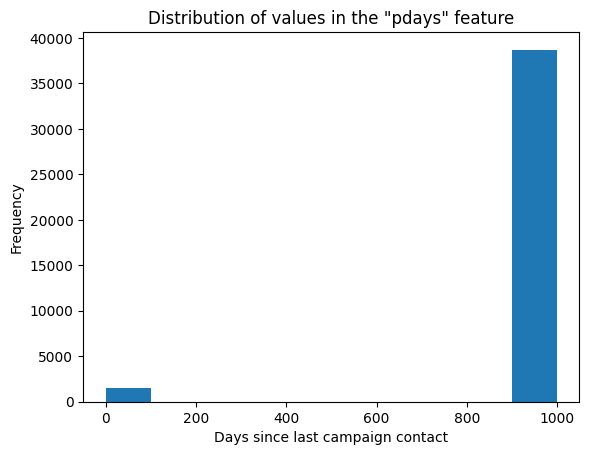

In [44]:
# The pdays column include the numerical number 999 for cases when client was not contacted prior

# Understand spread of data
plt.hist(df_final['pdays'])
plt.show # seems that majority of clients were not contacted prior
plt.xlabel('Days since last campaign contact')
plt.ylabel('Frequency')
plt.title('Distribution of values in the "pdays" feature')

# Calculate % of pdays that is 999
percent_not_contacted = (df_final['pdays'] == 999).mean() * 100
print(f"Percentage of clients not contacted prior: {percent_not_contacted:.2f}%")

In [45]:
# Given that 999 as a numerical number represents > 96% of pdays values and to avoid misleading interpretation by the classifier, we will recategorize this column as a binary feature in a new column and replace 999 by -1 in the original column

# Create new binary feature to indicate whether a customer was contacted before
df_final['was_contacted_before'] = df_final['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Replace 999 with -1 in the pdays columns
df_final['pdays'] = df_final['pdays'].replace(999, -1)

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40186 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   40186 non-null  int64  
 1   default               40186 non-null  int64  
 2   housing               40186 non-null  int64  
 3   loan                  40186 non-null  int64  
 4   campaign              40186 non-null  int64  
 5   pdays                 40186 non-null  int64  
 6   previous              40186 non-null  int64  
 7   emp.var.rate          40186 non-null  float64
 8   cons.conf.idx         40186 non-null  float64
 9   euribor3m             40186 non-null  float64
 10  y                     40186 non-null  int64  
 11  education_encoded     40186 non-null  float64
 12  month_encoded         40186 non-null  float64
 13  day_of_week_encoded   40186 non-null  float64
 14  job_blue-collar       40186 non-null  bool   
 15  job_entrepreneur      40

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [47]:
# Now that the dataset is prepared and finalized, we would like to split it into a test train set and scale after splitting

# Only features that are non binary or non boolean will be scaled and include: age, campaign, pdays, previous, emp.var.rate, cons.conf.idx, euribor3m, education_encoded, month_encoded, day_of_week_encoded

In [48]:
# Defining X and y
X = df_final.drop(columns = 'y')
y = df_final[['y']]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data for relevant columns (i.e. non binary and non boolean)
columns_to_scale = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'education_encoded', 'month_encoded', 'day_of_week_encoded']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [50]:
# Here we will calculate the accuracy score on the test data using the most frequent class of y
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assess most frequent class from training data
most_frequent_class = y_train.value_counts().idxmax()

# Use most frequent class as baseline for accuracy calculation when comparing to test data
y_pred_baseline = [most_frequent_class] * len(y_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

## Given the target data we are dealing with is highly imbalanced, we will also compute precsion and recall score.
# Given the nature of this business problem, high recall is likely of utmost importance to ensure we dont miss any potential clients that would have opted in

baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)

print(f'Baseline Accuracy: {baseline_accuracy:.2f}')
print(f'Baseline Precision: {baseline_precision:.2f}')
print(f'Baseline Recall: {baseline_recall:.2f}')

# As expected the baseline model does not do a good job at predicting "yes" scenarios since it is based on the majority class, hence precision and recall are 0%


Baseline Accuracy: 0.89
Baseline Precision: 0.00
Baseline Recall: 0.00


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [51]:
# Build logistic regression model while accounting for the imbalanced aspect of target variable
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [52]:
# Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.75


In [53]:
# As noted above accuracy is not an ideal evaluation method for this dataset given how imbalanced it is
# Below we calculate recall and precision as well as the confusion matrix

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision and recall
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[5362 1769]
 [ 272  635]]
Precision: 0.26
Recall: 0.70


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [54]:
import time
import sklearn.neighbors as KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [55]:
# Here we compare the performance across 4 classifiers with default settings (with the exception of ensuring class weight is balanced)
results = []

In [56]:
## LOGISTIC REGRESSION
start = time.time()
model_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_log.fit(X_train, y_train)
end = time.time()
train_time_log = end - start

y_train_pred_log = model_log.predict(X_train)
y_test_pred_log = model_log.predict(X_test)

train_accuracy_log = accuracy_score(y_train, y_train_pred_log)
test_accuracy_log = accuracy_score(y_test, y_test_pred_log)

results.append({'Model': 'Logistic Regression', 'Train Time': train_time_log, 'Train Accuracy': train_accuracy_log, 'Test Accuracy': test_accuracy_log})

In [57]:
## K NEAREST NEIGHBORS
start = time.time()
knn = KNeighborsClassifier.KNeighborsClassifier()
knn.fit(X_train, y_train)
end = time.time()
train_time_knn = end - start

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

results.append({'Model': 'KNN', 'Train Time': train_time_knn, 'Train Accuracy': train_accuracy_knn, 'Test Accuracy': test_accuracy_knn})

In [58]:
## DECISION TREES
start = time.time()
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_train, y_train)
end = time.time()
train_time_dt = end - start

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

results.append({'Model': 'Decision Tree', 'Train Time': train_time_dt, 'Train Accuracy': train_accuracy_dt, 'Test Accuracy': test_accuracy_dt})

In [59]:
## SUPPORT VECTOR MACHINE
start = time.time()
svm = SVC(class_weight = 'balanced')
svm.fit(X_train, y_train)
end = time.time()
train_time_svm = end - start

y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

results.append({'Model': 'SVM', 'Train Time': train_time_svm, 'Train Accuracy': train_accuracy_svm, 'Test Accuracy': test_accuracy_svm})

In [60]:
## Creating the dataframe and visualizing results
df_results = pd.DataFrame(results)
df_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.716529,0.744401,0.746081
1,KNN,0.049313,0.913245,0.890147
2,Decision Tree,0.319930,0.993374,0.842871
3,SVM,97.581276,0.832680,0.831301


In [61]:
# The results above highlight the differences across the 4 classifiers when run with their default settings:
# 1. Logistic regression ran fast and was consistent in performance across train and test sets but performed poorly overall when it comes to accuracy compared to other models
# 2. KNN was fast and performed well across the board but likely overfit on the training set
# 3. Decision Tree was relatively fast but overfit the training data as training accuracy was extremely high and lower test accuracy
# 4. SVM was very slow but performed relatively well across train and test sets

In [62]:
# Next we will 1) Evaluate these models using a better evaluation metric "recall"
# 2) We will improve our models through hyperparameter tuning and grid search techniques

In [63]:
# Evaluating models using recall as metric
recall_log = recall_score(y_test, y_test_pred_log)
recall_knn = recall_score(y_test, y_test_pred_knn)
recall_dt = recall_score(y_test, y_test_pred_dt)
recall_svm = recall_score(y_test, y_test_pred_svm)

recalls = [recall_log, recall_knn, recall_dt, recall_svm]

df_results["Recall"]= recalls
df_results

,Model,Train Time,Train Accuracy,Test Accuracy,Recall
0,Logistic Regression,0.716529,0.744401,0.746081,0.700110
1,KNN,0.049313,0.913245,0.890147,0.276736
2,Decision Tree,0.319930,0.993374,0.842871,0.326351
3,SVM,97.581276,0.832680,0.831301,0.642778


In [64]:
# When looking at the recall metric we see that Logistic regression performed best with a 70% score

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [65]:
# Since we had a good starting point with logistic regression, we aim to fine tune model parameters here

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param = { 'C': np.logspace(-3,1,10), 'penalty': ['l1','l2'], 'class_weight': ['balanced'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param, cv=5, scoring='recall')
grid.fit(X_train, y_train)

# Identifying best parameters and recall:
print("Best parameters: ", grid.best_params_)

#Run prediction on best estimator
best_log = grid.best_estimator_
y_pred_best_log = best_log.predict(X_test)

#Update table with best recall score
best_log_score = recall_score(y_test, y_pred_best_log)
best_log_accuracy = accuracy_score(y_test, y_pred_best_log)

best_log_results = pd.DataFrame({'Model': ['Logistic Regression Tuned'], 'Test Accuracy': [best_log_accuracy],  'Recall': [best_log_score]})
best_log_results

Best parameters:  {'C': np.float64(0.001), 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


,Model,Test Accuracy,Recall
0,Logistic Regression Tuned,0.721946,0.723264


In [66]:
# Gridsearch cv improved the logistic regression model by just couple percentage points.
# Although computationally costly, we fine tune next the SVM model since it had the second best recall score

param_svm = {'C': [0.1, 1], 'kernel': ['linear'], 'class_weight': ['balanced']}
grid_svm = GridSearchCV(SVC(), param_svm, cv=3, scoring='recall')
grid_svm.fit(X_train, y_train)

# Identifying best parameters and recall:
print("Best parameters: ", grid_svm.best_params_)

best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

best_svm_score = recall_score(y_test, y_pred_best_svm)
best_svm_accuracy = accuracy_score(y_test, y_pred_best_svm)

best_svm_results = pd.DataFrame({'Model': ['SVM Tuned'], 'Test Accuracy': [best_svm_accuracy],  'Recall': [best_svm_score]})
best_svm_results

Best parameters:  {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}


,Model,Test Accuracy,Recall
0,SVM Tuned,0.722195,0.723264


In [67]:
## Since we are able to achieve a 72% recall with the fine tuned logistic regression model at a reasonable speed, we will anchor on this model moving forward

In [70]:
## Extracting Coefficients from the tuned logistic model

# Get feature names
feature_names = X_train.columns

coefficients = best_log.coef_[0].round(3)
intercept = best_log.intercept_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients to see most impactful features
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print(coef_df)
print(f"Intercept: {intercept}")


                 Feature  Coefficient
9              euribor3m       -0.498
5                  pdays        0.232
7           emp.var.rate       -0.128
8          cons.conf.idx        0.036
11         month_encoded        0.002
0                    age        0.000
2                housing        0.000
6               previous        0.000
4               campaign        0.000
3                   loan        0.000
1                default        0.000
10     education_encoded        0.000
12   day_of_week_encoded        0.000
13       job_blue-collar        0.000
14      job_entrepreneur        0.000
15         job_housemaid        0.000
16        job_management        0.000
17           job_retired        0.000
18     job_self-employed        0.000
19          job_services        0.000
20           job_student        0.000
21        job_technician        0.000
22        job_unemployed        0.000
23       marital_married        0.000
24        marital_single        0.000
25     conta

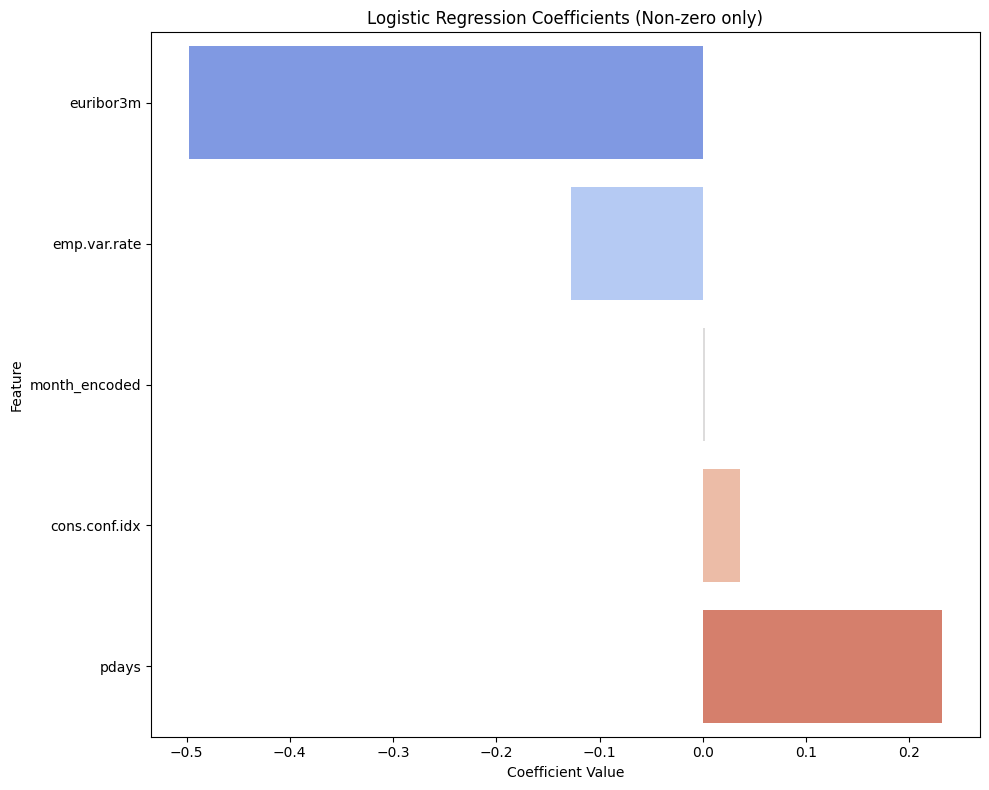

In [73]:
# Visualizing Coefficients

import seaborn as sns

# Filter out zero coefficients (or those very close to zero)
coef_df_non_zero = coef_df[~coef_df['Coefficient'].apply(lambda x: np.isclose(x, 0))]

coef_df_sorted = coef_df_non_zero.sort_values(by='Coefficient')

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted, palette='coolwarm')

plt.title('Logistic Regression Coefficients (Non-zero only)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [74]:
## The outputs of the logistic regresion model suggest that 4 features are most important when predicting whether a client will subscribe a term deposit
# 1. euribor3m - Higher euribor rate (3 mo) decreases odds of client subscribing. Suggesting that when interest rates are high, clients are less likely to subscribe
# 2. pdays - The number of days since last client was contacted has a positive coefficient suggesting that clients that werent contacted recently are more receptive to the campaign now
# 3. emp.var.rate - The employement variation rate is negatively correlated with likelihood of subscribing reflecting potential impact of macroeconomic conditions on client decisions
# 4. cons.conf.idx - When consumer conficence index rises, likelihood of subscribing increases slightly suggesting higher confidence can mean more willingness to invest

##### Questions